# **SVM**

**What will we learn?**
1. **Introduction**: What is SVM?
2. **Cost Function**
3. **Decision Boundary**: Proper classification. 
4. **Kernels** : What is Kernel?
6. **Scikit-learn Implementation**
7. **Non-Linear SVM**
8. **Landmarks**
9. **Different kinds of Kernels**
10. **Multiclass Classification**
11. **GridSearchCV**: Choosing Parameters Using Grid Search
12. **Advantages and Disadvantages of SVM** 

Support Vector Machine(SVM) is a powerful classifier that works both on linearly
and nonlinearly separable data.

<img src = "https://files.codingninjas.in/svm1-7553.JPG">

SVM tries to find the “best” margin (distance between the line and the support
vectors) that separates the classes. This reduces the risk of error on the data, while
logistic regression does not. Instead it can have different decision boundaries with
different weights that are near to the optimal point.


## **Cost Function**


<img src = "https://files.codingninjas.in/svm2-7554.JPG">

The Cost Function is used to train the SVM. By minimizing the value of J(theta), we can ensure that the SVM is as accurate as possible. In the equation, the functions $cost_1$ and $cost_0$ refer to the cost for an example where y = 1 and the cost for an example where y = 0 respectively. For SVMs, cost is determined by kernel (similarity) functions.


<img src = "https://files.codingninjas.in/svm3-7555.JPG" >




## **Decision Boundary**

It is a plane of $n - 1$ dimensions in $n$ dimensional feature space that separates the two classes for a 2-D feature space, it would be a line and for a 3-D feature space it would be a plane and so on. Decision Boundary is also known as a hyperplane.

Now, the goal is to choose a decision boundary with the greatest possible margin
between the decision boundary and any point within the training set, giving a
greater chance of new data being classified correctly.

<img src = "https://files.codingninjas.in/svm4-7556.JPG">

Lets glance at a few points:

● If you were just using the large margin, then SVM would be very sensitive to outliers.

$ \qquad $ <img src = "	https://files.codingninjas.in/svm5-7557.JPG">

● If C is very large then we use this quite naive “maximize the margin”
approach and select the magenta boundary.

$ \qquad $ <img src = "https://files.codingninjas.in/svm6-7558.JPG">

● But if C is reasonably small, then you stick with the black
decision boundary

## **Kernels**

The main function of the kernel is to transform the given dataset input data into the
required form. There are various types of functions such as linear, polynomial, and
radial basis functions (RBF). Polynomial and RBF are useful for non-linear
hyperplane. Polynomial and RBF kernels compute the separation line in the higher
dimension. In some applications, it is suggested to use a more complex
kernel to separate the classes that are curved or nonlinear. This transformation can
lead to more accurate classifiers.


## **SVM using Sklearn**

**Step 1 -** We will create dummy data where there will be two features and
corresponding to them there will be a label given which will tell to which class the feature belongs to.

In [1]:
import numpy as np
X = np.array([[1, 1], [2, 1], [1, 2], [1.5, 1.5], [3, 4], [2, 5], [4, 3], [7, 2], [3, 5], [2, 6], [6, 2], [3, 4], [4, 4]])
y = [0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]

**Step 2 -** Plot both features on a plane .

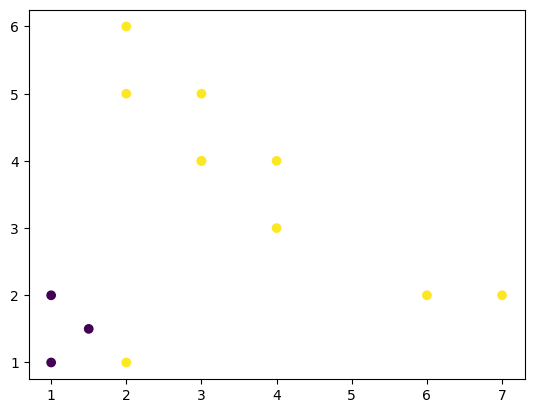

In [2]:
import matplotlib.pyplot as plt
X_x1 = X[:, 0]
X_x2 = X[:, 1]
plt.scatter(X_x1, X_x2, c = y)
plt.show()

**Step 3 -** Now we will create a support vector classifier object by passing the
argument kernel as the linear kernel in SVC() function. Then, fit your model on train set using fit()


In [3]:
from sklearn.svm import SVC
svcLinear =  SVC(kernel='linear', C=10000).fit(X, y)
svcLinear.coef_, svcLinear.intercept_

(array([[3.99804688e+00, 2.22044605e-16]]), array([-6.99633789]))

**Step 4 -** The SVC function returns the coefficient as well as the intercept of the
hyperplane using which we will plot the hyperplane.

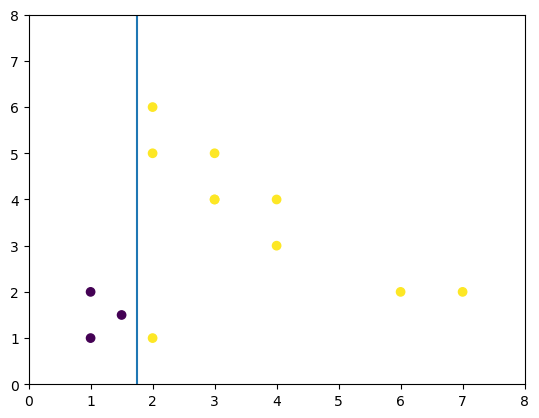

In [4]:
x1 = np.array([0, 5])
x2 = -1 *(svcLinear.intercept_ + svcLinear.coef_[0][0] * x1)/svcLinear.coef_[0][1]
plt.plot(x1, x2)
plt.scatter(X_x1, X_x2, c = y)
plt.axis([0, 8, 0, 8])
plt.show()

Here, the blue line represents the hyperplane which is separating the two features.
The value of C is large so it will create a decision boundary which will not cause any
error but the margin will be low. But if we change the value of C to be 1 then the
decision boundary will have a high margin with a small error.

## **Non-Linear SVM**


<img src = "https://files.codingninjas.in/svm7-7559.JPG">

First way to find a nonlinear boundary is to come up with a complex set of
polynomial features to fit the data.

● Have $hθ(x)$ which

$\qquad$○ Returns 1, if the combined weighted sum of vectors (weighted by the
parameter vector) is less than or equal to 0.

$\qquad$○ Else return 0.


Another way of writing this is

● That a hypothesis computes a decision boundary by taking the sum of the
parameter vector multiplied by a new feature vector f, which simply contains
the various high order x terms.

● e.g.

$\qquad$ ○ $hθ(x) = θ_0+ θ_1f_1+ θ_2f_2 + θ_3f_3$

$\qquad$○ Where

$\qquad$$\qquad$■ $f_1= x_1$

$\qquad$$\qquad$■ $f_2 = x_1x_2$

$\qquad$$\qquad$■ $f_3 = ...$

$\qquad$$\qquad$■ i.e. not specific values, but each of the terms from your complex
polynomial function.

As we saw with computer imaging, high order polynomials become computationally
expensive.


## **Landmarks**

To create extra features for Non-linear decision boundaries, we mostly rely on polynomial functions that are some combination of the features already present. However, there may be better non-polynomial extra features that lead to higher accuracy. 

SVM finds new features by selecting random datapoints called landmarks from the dataset and defines **similarity functions (or kernels)** corresponding to each landmark

Following is an example:

● New features

$\qquad$○ Define three features in this example (ignore $x_0$)

$\qquad$○ Have a graph of $x_1$ vs. $x_2$
(don't plot the values, just define the space)

$\qquad$○ Pick three points in that space

<img src = "https://files.codingninjas.in/svm8-7560.JPG">

These points $l^1$, $l^2$, and $l^3$, are chosen manually and are the landmarks. Now we will choose kernels that will act as similarity functions for each of these landmarks. The kernel used can be chosen from the choices given below

## **Different kinds of Kernels**

**1. Gaussian Kernel**

*   Need to define$ \sigma (\sigma^2)$
*   When would you choose a Gaussian?
*   If n is small and/or m is large
*   e.g. 2D training set that's large
*  If you're using a Gaussian kernel then you may need to implement the kernel function
*   e.g. a function fi = kernel(x1,x2)
*   Returns a real number
*   Some SVM packages will expect you to define kernel
*   Although, some SVM implementations include the Gaussian and a few
*   Gaussian is probably most popular kernel
*   Returns a real number
*   NB - make sure you perform feature scaling before using a Gaussian kernel



**2. Linear Kernel**

$\qquad$● Predict y = 1 if $(θ^T
 x) >= 0$

$\qquad$$\qquad$○ So no f vector

$\qquad$$\qquad$○ Get a standard linear classifier

$\qquad$● Why do this?

$\qquad$$\qquad$○ If n is large and m is small then

$\qquad$$\qquad$$\qquad$■ Lots of features, few examples

$\qquad$$\qquad$$\qquad$■ Not enough data - risk overfitting in a high dimensional
feature-space

**3. Polynomial Kernel**

$\qquad$● We measure the similarity of x and l by doing one of where I is Identity
matrix.

$\qquad$$\qquad$○ $(x^T l)^2$

$\qquad$$\qquad$○ $(x^T l)^3$

$\qquad$$\qquad$○ $(x^T (l+1))^3$

$\qquad$● General form is

$\qquad$$\qquad$○ $(x^T (l+Con))^D$

$\qquad$● If they're similar then the inner product tends to be large.

$\qquad$● Not used that often.

$\qquad$● Two parameters

$\qquad$$\qquad$○ Degree of polynomial $(D)$

$\qquad$$\qquad$○ Number you add to $l (Con)$

$\qquad$● Usually performs worse than the Gaussian kernel.

$\qquad$● Used when x and l are both non-negative.


## **Multiclass Classification**

In its most simple form, SVM is applied on binary classification, i.e., classifying data
points in one of two classes. For multiclass classification, the same principle is utilized.

The multiclass problem is broken down to multiple binary classification cases,
which is also called **one-vs-one**. In scikit-learn **one-vs-one** is not default, and needs
to be selected explicitly (as can be seen further down in the code). 

**One-vs-rest** is set
as default. It basically divides the data points in **class x** and **rest.** Consecutively a
certain class is distinguished from all other classes.
The number of classifiers necessary for one-vs-one multiclass classification can be
retrieved with the following formula (with n being the number of classes):

$$\frac{n*(n - 1)}{2}$$

In the one-vs-one approach, each classifier separates points of two different classes
and comprising all one-vs-one classifiers leads to a multiclass classifier.

### **Multiclass Classification on IRIS Dataset**

**Step 1 -** Import the libraries

In [ ]:
from sklearn import svm, datasets
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

**Step 2 -** Load the Dataset

Store variables as target y and the first two features as x (sepal length and sepal
width of the iris flowers)


In [ ]:
iris = datasets.load_iris()
x = iris.data[:, 0:2]
y = iris.target

**Step 3 -** Split the Dataset

Now let’s split the dataset in train and test set for the training and prediction.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

**Step 4 -** Different Kernels

We take a look at the different kernel functions. The penalty term C is set to 1 for all
classifiers. For the polynomial function, degree of 3 is selected. This is not
necessary for other kernel functions


In [ ]:
clf = svm.SVC(kernel = 'linear')
clf.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Also we can use different kernels such as :

1. rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
2. poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
3. sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

**Step 5 -**

Now let's specify the mesh, in which we will plot the results.

Here h is the step size in the mesh, it alters the accuracy of the plotprint.

In [ ]:
def makegrid(x1, x2, h = 0.02):
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    a = np.arange(x1_min,x1_max,h)
    b = np.arange(x2_min, x2_max, h)
    xx, yy = np.meshgrid(a, b)
    return xx, yy

**Step 6 -**

Now, we will plot the decision boundary.


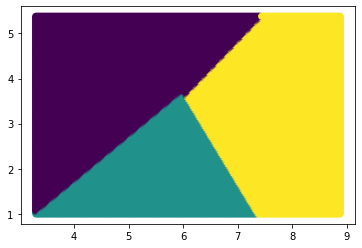

In [ ]:
xx, yy = makegrid(x[:, 0], x[:, 1])
predictions = clf.predict(np.c_[xx.ravel(), yy.ravel()])
plt.scatter(xx.ravel(), yy.ravel(), c = predictions)
plt.show()

The decision boundary looks like this for a linear kernel.

In [ ]:
# Score
clf.score(x_test, y_test)

0.8157894736842105

## **Choosing Parameters Using Grid Search**

Grid search optimizes the SVM parameters (C, degree, etc) using a cross
validation (CV) technique as a performance metric. The goal is to identify good
hyper-parameter combinations so that the classifier can predict unknown data
accurately.

To choose C and using k-fold CV, we first split the available data into k subsets (in
most experiments we set k to be 10). One subset is used as a testing data and then
evaluated using the remaining $k - 1$ training subsets. Then we calculate the CV error
using this split error for the
SVM classifier using different values of C, and other parameters. Various
combinations of hyper-parameter values are entered and the one with the best
cross-validation accuracy (or the lowest CV error) is selected and used to train an
SVM on the whole dataset.

<img src = "https://files.codingninjas.in/svm9-7561.JPG" height = "500">

### **Example: Grid Search On SVM**

**Step 1 -** Import the libraries

In [ ]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

**Step 2 -** Load The Dataset

In [ ]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

**Step 3 -** Split the Dataset into Training and testing data


In [ ]:
x_train,x_test, y_train, y_test = train_test_split(x, y)

**Using the Grid Search**
Here, we will provide different sets of values for both C and gamma and using grid
search we will find the best values on which the score will be the highest.

In [ ]:
clf = svm.SVC()
grid = {'C' : [1e2, 1e3, 5e3, 1e4, 5e4, 1e5],
       'gamma' : [1e-3, 5e-4, 1e-4, 5e-3]}
abc = GridSearchCV(clf, grid)
abc.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100.0, 1000.0, 5000.0, 10000.0, 50000.0,
                               100000.0],
                         'gamma': [0.001, 0.0005, 0.0001, 0.005]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Using the best estimator function we will find the best value of C and gamma


In [ ]:
abc.best_estimator_

SVC(C=100.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

The value of C using grid search came to be 1000 and the value of gamma is 0.005 .

The grid search function can be optimised according to our needs using various
parameters. For additional details you may visit the documentation by clicking on
the following link:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

● SVM parameters (C)

$\qquad$○ Bias and variance trade off

$\qquad$○ Must chose C

$\qquad$$\qquad$■ C plays a role similar to $1/\lambda$ (where $\lambda$ is the
regularization parameter)

$\qquad$○ Large C gives a hypothesis of low bias high variance --> overfitting

$\qquad$○ Small C gives a hypothesis of high bias low variance --> underfitting

● SVM parameters $(σ^2)$

$\qquad$○ Parameter for calculating f values

$\qquad$$\qquad$■ Large $(σ^2)$ - f features vary more smoothly - higher bias, lower variance

$\qquad$$\qquad$■ Small $(σ^2)$ - f features vary abruptly - ow bias, high variance


## **Avantages and Disadvantages of SVM Classifiers**

**Avantages of SVM classifiers:**

1. SVM classifiers offer great accuracy and work well with high dimensional space.

2. SVM classifiers basically use a subset of training points hence in result uses very
less memory.

**Disadvantages of SVM classifiers:**

1. They have high training time hence in practice not suitable for large datasets.
2. SVM classifiers do not work well with overlapping classes.